In [1]:
import keypress_recognition.models as models
from keypress_recognition import dataset_p as dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

In [2]:
concat = False
delta = 3 if concat else 1
channels = 3 * delta

In [3]:
dataset.load_all_data(color=['black'], size=['bundle'], keypress=True, concatenate=concat, delta=delta)

Start seperating keyboard ...
  White single width: 21px
  Black single width: 20px
  White bundle width: 37px
  Black bundle width: 36px


IntProgress(value=0, max=14273)

In trainset: 
  # of pressed black key: 8755
  # of unpressed black key: 44071


IntProgress(value=0, max=5000)

In testset: 
  # of pressed black key: 761
  # of unpressed black key: 22613


IntProgress(value=0, max=2993)

In valset: 
  # of pressed black key: 817
  # of unpressed black key: 10785


In [4]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Y" if note else "N")

def display_concat_img(img, idx=None):
    if concat:
        if idx is None:
            return img[:, :, :, 3:6]
        else:
            return img[idx, :, :, 3:6]
    if idx is None:
        return img
    else:
        return img[idx, :, :, :]


Samples from X_train: 


IntProgress(value=0, max=88142)

(2, 106, 36, 3)
1 0
Samples from X_test: 


IntProgress(value=0, max=23374)

(2, 106, 36, 3)
0 0
Samples from X_val: 


IntProgress(value=0, max=11602)

(2, 106, 36, 3)
0 0


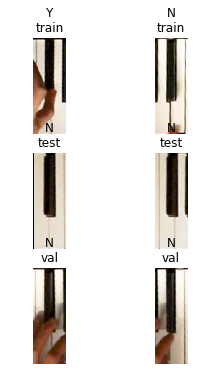

In [5]:
# print several images with labels
fig, axarr = plt.subplots(3, 2, figsize=[4, 6])
for ii, _type in enumerate(['train', 'test', 'val']):

    print(f'Samples from X_{_type}: ')

    for imgb, noteb, _ in dataset.data_batch(type=_type, size='bundle', color='black', batch_size=2, NCHW=False, need_velocity=False, concatenate=concat):
        print(imgb.shape)
        print(noteb[0], noteb[1])
        axarr[ii,0].imshow(cv2.cvtColor(display_concat_img(imgb, 0), cv2.COLOR_BGR2RGB))
        axarr[ii,0].set_title(visualize_keys(noteb[0]) + '\n' + _type)
        axarr[ii,0].axis('off')
        axarr[ii,1].imshow(cv2.cvtColor(display_concat_img(imgb, 1), cv2.COLOR_BGR2RGB))
        axarr[ii,1].set_title(visualize_keys(noteb[1]) + '\n' + _type)
        axarr[ii,1].axis('off')
        break

plt.show()

In [6]:
bmodel = models.get_black_bundle_model(channels)
bmodel.train(dataset, batch_size=32, size='bundle', color='black',
             concatenate=concat,
             num_epochs=200,
             max_num=-1,
             learning_rate=1e-3,
             weight_decay=0.1,
             decay_every=10,
             decay_by=0.5,
             best_path='keypress_recognition/best_black_bundle_model.tar',
             current_path='keypress_recognition/current_black_bundle.tar',
             method=1)

Epoch 1/200


IntProgress(value=0, max=88142)

train Loss: 0.3469
[[40310  3701]
 [ 3770 40379]]
Precision: 0.91
Recall   : 0.92
Accuracy : 0.92


IntProgress(value=0, max=11602)

val Loss: 0.1570
[[10253    17]
 [  546   800]]
Precision: 0.59
Recall   : 0.98
Accuracy : 0.95
The best model has been saved to keypress_recognition/best_black_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 2/200


IntProgress(value=0, max=88142)

train Loss: 0.3205
[[39682  3431]
 [ 4398 40649]]
Precision: 0.90
Recall   : 0.92
Accuracy : 0.91


IntProgress(value=0, max=11602)

val Loss: 0.1022
[[10515    28]
 [  284   789]]
Precision: 0.74
Recall   : 0.97
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_black_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 3/200


IntProgress(value=0, max=88142)

train Loss: 0.3181
[[39757  3283]
 [ 4323 40797]]
Precision: 0.90
Recall   : 0.93
Accuracy : 0.91


IntProgress(value=0, max=11602)

val Loss: 0.0751
[[10521    58]
 [  278   759]]
Precision: 0.73
Recall   : 0.93
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_black_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 4/200


IntProgress(value=0, max=88142)

train Loss: 0.3164
[[39605  3147]
 [ 4475 40933]]
Precision: 0.90
Recall   : 0.93
Accuracy : 0.91


IntProgress(value=0, max=11602)

val Loss: 0.1302
[[10304     8]
 [  495   809]]
Precision: 0.62
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 5/200


IntProgress(value=0, max=88142)

train Loss: 0.3161
[[39936  3424]
 [ 4144 40656]]
Precision: 0.91
Recall   : 0.92
Accuracy : 0.91


IntProgress(value=0, max=11602)

val Loss: 0.1129
[[10445    15]
 [  354   802]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 6/200


IntProgress(value=0, max=88142)

train Loss: 0.3147
[[40002  3178]
 [ 4078 40902]]
Precision: 0.91
Recall   : 0.93
Accuracy : 0.92


IntProgress(value=0, max=11602)

val Loss: 0.0729
[[10563    68]
 [  236   749]]
Precision: 0.76
Recall   : 0.92
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_black_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 7/200


IntProgress(value=0, max=88142)

train Loss: 0.3153
[[39921  3239]
 [ 4159 40841]]
Precision: 0.91
Recall   : 0.93
Accuracy : 0.92


IntProgress(value=0, max=11602)

val Loss: 0.1848
[[9939    5]
 [ 860  812]]
Precision: 0.49
Recall   : 0.99
Accuracy : 0.93
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 8/200


IntProgress(value=0, max=88142)

train Loss: 0.3140
[[39955  3253]
 [ 4125 40827]]
Precision: 0.91
Recall   : 0.93
Accuracy : 0.92


IntProgress(value=0, max=11602)

val Loss: 0.1322
[[10316    11]
 [  483   806]]
Precision: 0.63
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 9/200


IntProgress(value=0, max=88142)

train Loss: 0.3147
[[40044  3059]
 [ 4036 41021]]
Precision: 0.91
Recall   : 0.93
Accuracy : 0.92


IntProgress(value=0, max=11602)

val Loss: 0.3861
[[9001    2]
 [1798  815]]
Precision: 0.31
Recall   : 1.00
Accuracy : 0.85
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 10/200


IntProgress(value=0, max=88142)

train Loss: 0.3141
[[40086  3328]
 [ 3994 40752]]
Precision: 0.91
Recall   : 0.92
Accuracy : 0.92


IntProgress(value=0, max=11602)

val Loss: 0.2084
[[9861    5]
 [ 938  812]]
Precision: 0.46
Recall   : 0.99
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 11/200


IntProgress(value=0, max=88142)

train Loss: 0.2992
[[40570  2698]
 [ 3510 41382]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11602)

val Loss: 0.0932
[[10447    22]
 [  352   795]]
Precision: 0.69
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 12/200


IntProgress(value=0, max=88142)

train Loss: 0.2960
[[40716  2474]
 [ 3364 41606]]
Precision: 0.93
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11602)

val Loss: 0.2564
[[9654    3]
 [1145  814]]
Precision: 0.42
Recall   : 1.00
Accuracy : 0.90
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 13/200


IntProgress(value=0, max=88142)

train Loss: 0.2943
[[40666  2628]
 [ 3414 41452]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11602)

val Loss: 0.0927
[[10528    25]
 [  271   792]]
Precision: 0.75
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 14/200


IntProgress(value=0, max=88142)

train Loss: 0.2936
[[40503  2593]
 [ 3577 41487]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11602)

val Loss: 0.0779
[[10671    96]
 [  128   721]]
Precision: 0.85
Recall   : 0.88
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 15/200


IntProgress(value=0, max=88142)

train Loss: 0.2941
[[40542  2545]
 [ 3538 41535]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11602)

val Loss: 0.1451
[[10214     7]
 [  585   810]]
Precision: 0.58
Recall   : 0.99
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 16/200


IntProgress(value=0, max=88142)

train Loss: 0.2924
[[40556  2573]
 [ 3524 41507]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11602)

val Loss: 0.0742
[[10566    31]
 [  233   786]]
Precision: 0.77
Recall   : 0.96
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 17/200


IntProgress(value=0, max=88142)

train Loss: 0.2938
[[40566  2538]
 [ 3514 41542]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11602)

val Loss: 0.0953
[[10514    32]
 [  285   785]]
Precision: 0.73
Recall   : 0.96
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 18/200


IntProgress(value=0, max=88142)

train Loss: 0.2915
[[40664  2523]
 [ 3416 41557]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11602)

val Loss: 0.0553
[[10739   132]
 [   60   685]]
Precision: 0.92
Recall   : 0.84
Accuracy : 0.98
The best model has been saved to keypress_recognition/best_black_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 19/200


IntProgress(value=0, max=88142)

train Loss: 0.2908
[[40480  2683]
 [ 3600 41397]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11602)

val Loss: 0.0717
[[10568    66]
 [  231   751]]
Precision: 0.76
Recall   : 0.92
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 20/200


IntProgress(value=0, max=88142)

train Loss: 0.2899
[[40512  2481]
 [ 3568 41599]]
Precision: 0.92
Recall   : 0.94
Accuracy : 0.93


IntProgress(value=0, max=11602)

val Loss: 0.0802
[[10527    64]
 [  272   753]]
Precision: 0.73
Recall   : 0.92
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 21/200


IntProgress(value=0, max=88142)

train Loss: 0.2766
[[41125  2149]
 [ 2955 41931]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11602)

val Loss: 0.0810
[[10556    49]
 [  243   768]]
Precision: 0.76
Recall   : 0.94
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 22/200


IntProgress(value=0, max=88142)

train Loss: 0.2740
[[41065  2136]
 [ 3015 41944]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11602)

val Loss: 0.0920
[[10513    15]
 [  286   802]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 23/200


IntProgress(value=0, max=88142)

train Loss: 0.2751
[[41069  2039]
 [ 3011 42041]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11602)

val Loss: 0.1234
[[10271     9]
 [  528   808]]
Precision: 0.60
Recall   : 0.99
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 24/200


IntProgress(value=0, max=88142)

train Loss: 0.2744
[[41012  2086]
 [ 3068 41994]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11602)

val Loss: 0.0693
[[10562    23]
 [  237   794]]
Precision: 0.77
Recall   : 0.97
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 25/200


IntProgress(value=0, max=88142)

train Loss: 0.2722
[[41180  2042]
 [ 2900 42038]]
Precision: 0.94
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11602)

val Loss: 0.1230
[[10247     8]
 [  552   809]]
Precision: 0.59
Recall   : 0.99
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 26/200


IntProgress(value=0, max=88142)

train Loss: 0.2714
[[41107  2094]
 [ 2973 41986]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11602)

val Loss: 0.0752
[[10561    27]
 [  238   790]]
Precision: 0.77
Recall   : 0.97
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 27/200


IntProgress(value=0, max=88142)

train Loss: 0.2721
[[41164  2115]
 [ 2916 41965]]
Precision: 0.94
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11602)

val Loss: 0.1048
[[10370    15]
 [  429   802]]
Precision: 0.65
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 28/200


IntProgress(value=0, max=88142)

train Loss: 0.2715
[[41083  2227]
 [ 2997 41853]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11602)

val Loss: 0.1699
[[10067     8]
 [  732   809]]
Precision: 0.52
Recall   : 0.99
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 29/200


IntProgress(value=0, max=88142)

train Loss: 0.2713
[[41035  2172]
 [ 3045 41908]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11602)

val Loss: 0.1508
[[10147     7]
 [  652   810]]
Precision: 0.55
Recall   : 0.99
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 30/200


IntProgress(value=0, max=88142)

train Loss: 0.2714
[[41129  2067]
 [ 2951 42013]]
Precision: 0.93
Recall   : 0.95
Accuracy : 0.94


IntProgress(value=0, max=11602)

val Loss: 0.2217
[[9841    1]
 [ 958  816]]
Precision: 0.46
Recall   : 1.00
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 31/200


IntProgress(value=0, max=88142)

train Loss: 0.2603
[[41396  1832]
 [ 2684 42248]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0838
[[10534    18]
 [  265   799]]
Precision: 0.75
Recall   : 0.98
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 32/200


IntProgress(value=0, max=88142)

train Loss: 0.2597
[[41399  1924]
 [ 2681 42156]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0933
[[10415    20]
 [  384   797]]
Precision: 0.67
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 33/200


IntProgress(value=0, max=88142)

train Loss: 0.2599
[[41349  1790]
 [ 2731 42290]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0655
[[10597    38]
 [  202   779]]
Precision: 0.79
Recall   : 0.95
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 34/200


IntProgress(value=0, max=88142)

train Loss: 0.2598
[[41455  1902]
 [ 2625 42178]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.1168
[[10277    10]
 [  522   807]]
Precision: 0.61
Recall   : 0.99
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 35/200


IntProgress(value=0, max=88142)

train Loss: 0.2596
[[41435  1810]
 [ 2645 42270]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.1314
[[10255     8]
 [  544   809]]
Precision: 0.60
Recall   : 0.99
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 36/200


IntProgress(value=0, max=88142)

train Loss: 0.2584
[[41412  1879]
 [ 2668 42201]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0689
[[10588    44]
 [  211   773]]
Precision: 0.79
Recall   : 0.95
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 37/200


IntProgress(value=0, max=88142)

train Loss: 0.2598
[[41370  1831]
 [ 2710 42249]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0739
[[10579    51]
 [  220   766]]
Precision: 0.78
Recall   : 0.94
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 38/200


IntProgress(value=0, max=88142)

train Loss: 0.2588
[[41446  1885]
 [ 2634 42195]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.2101
[[9877    1]
 [ 922  816]]
Precision: 0.47
Recall   : 1.00
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 39/200


IntProgress(value=0, max=88142)

train Loss: 0.2590
[[41386  1851]
 [ 2694 42229]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.1478
[[10148     4]
 [  651   813]]
Precision: 0.56
Recall   : 1.00
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 40/200


IntProgress(value=0, max=88142)

train Loss: 0.2588
[[41367  1872]
 [ 2713 42208]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0724
[[10574    34]
 [  225   783]]
Precision: 0.78
Recall   : 0.96
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 41/200


IntProgress(value=0, max=88142)

train Loss: 0.2539
[[41491  1724]
 [ 2589 42356]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.1286
[[10261     6]
 [  538   811]]
Precision: 0.60
Recall   : 0.99
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 42/200


IntProgress(value=0, max=88142)

train Loss: 0.2519
[[41558  1714]
 [ 2522 42366]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0881
[[10491    21]
 [  308   796]]
Precision: 0.72
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 43/200


IntProgress(value=0, max=88142)

train Loss: 0.2516
[[41566  1694]
 [ 2514 42386]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0953
[[10446    22]
 [  353   795]]
Precision: 0.69
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 44/200


IntProgress(value=0, max=88142)

train Loss: 0.2516
[[41549  1730]
 [ 2531 42350]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0679
[[10614    57]
 [  185   760]]
Precision: 0.80
Recall   : 0.93
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 45/200


IntProgress(value=0, max=88142)

train Loss: 0.2515
[[41547  1695]
 [ 2533 42385]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.1157
[[10326    10]
 [  473   807]]
Precision: 0.63
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 46/200


IntProgress(value=0, max=88142)

train Loss: 0.2511
[[41566  1694]
 [ 2514 42386]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.1489
[[10159     6]
 [  640   811]]
Precision: 0.56
Recall   : 0.99
Accuracy : 0.94
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 47/200


IntProgress(value=0, max=88142)

train Loss: 0.2508
[[41608  1698]
 [ 2472 42382]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0637
[[10657    51]
 [  142   766]]
Precision: 0.84
Recall   : 0.94
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 48/200


IntProgress(value=0, max=88142)

train Loss: 0.2515
[[41579  1738]
 [ 2501 42342]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0813
[[10530    26]
 [  269   791]]
Precision: 0.75
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 49/200


IntProgress(value=0, max=88142)

train Loss: 0.2503
[[41595  1656]
 [ 2485 42424]]
Precision: 0.94
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0913
[[10442    17]
 [  357   800]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 50/200


IntProgress(value=0, max=88142)

train Loss: 0.2500
[[41644  1751]
 [ 2436 42329]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.1016
[[10422    22]
 [  377   795]]
Precision: 0.68
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 51/200


IntProgress(value=0, max=88142)

train Loss: 0.2469
[[41639  1619]
 [ 2441 42461]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0935
[[10443    16]
 [  356   801]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 52/200


IntProgress(value=0, max=88142)

train Loss: 0.2458
[[41668  1639]
 [ 2412 42441]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0842
[[10508    23]
 [  291   794]]
Precision: 0.73
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 53/200


IntProgress(value=0, max=88142)

train Loss: 0.2469
[[41632  1639]
 [ 2448 42441]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0806
[[10525    20]
 [  274   797]]
Precision: 0.74
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 54/200


IntProgress(value=0, max=88142)

train Loss: 0.2461
[[41684  1627]
 [ 2396 42453]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0781
[[10531    26]
 [  268   791]]
Precision: 0.75
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 55/200


IntProgress(value=0, max=88142)

train Loss: 0.2453
[[41644  1632]
 [ 2436 42448]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0993
[[10411    12]
 [  388   805]]
Precision: 0.67
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 56/200


IntProgress(value=0, max=88142)

train Loss: 0.2459
[[41674  1611]
 [ 2406 42469]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.1313
[[10210     7]
 [  589   810]]
Precision: 0.58
Recall   : 0.99
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 57/200


IntProgress(value=0, max=88142)

train Loss: 0.2456
[[41657  1610]
 [ 2423 42470]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0939
[[10478    19]
 [  321   798]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 58/200


IntProgress(value=0, max=88142)

train Loss: 0.2450
[[41676  1661]
 [ 2404 42419]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0873
[[10480    19]
 [  319   798]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 59/200


IntProgress(value=0, max=88142)

train Loss: 0.2452
[[41670  1630]
 [ 2410 42450]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.0649
[[10629    46]
 [  170   771]]
Precision: 0.82
Recall   : 0.94
Accuracy : 0.98
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 60/200


IntProgress(value=0, max=88142)

train Loss: 0.2446
[[41686  1651]
 [ 2394 42429]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.95


IntProgress(value=0, max=11602)

val Loss: 0.1173
[[10314    12]
 [  485   805]]
Precision: 0.62
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 61/200


IntProgress(value=0, max=88142)

train Loss: 0.2415
[[41739  1615]
 [ 2341 42465]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0966
[[10431    16]
 [  368   801]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 62/200


IntProgress(value=0, max=88142)

train Loss: 0.2420
[[41753  1628]
 [ 2327 42452]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0928
[[10455    21]
 [  344   796]]
Precision: 0.70
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 63/200


IntProgress(value=0, max=88142)

train Loss: 0.2412
[[41724  1597]
 [ 2356 42483]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0941
[[10442    17]
 [  357   800]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 64/200


IntProgress(value=0, max=88142)

train Loss: 0.2410
[[41741  1595]
 [ 2339 42485]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.1042
[[10387    15]
 [  412   802]]
Precision: 0.66
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 65/200


IntProgress(value=0, max=88142)

train Loss: 0.2407
[[41723  1593]
 [ 2357 42487]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0872
[[10475    22]
 [  324   795]]
Precision: 0.71
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 66/200


IntProgress(value=0, max=88142)

train Loss: 0.2406
[[41751  1588]
 [ 2329 42492]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0888
[[10465    21]
 [  334   796]]
Precision: 0.70
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 67/200


IntProgress(value=0, max=88142)

train Loss: 0.2413
[[41760  1620]
 [ 2320 42460]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0886
[[10479    17]
 [  320   800]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 68/200


IntProgress(value=0, max=88142)

train Loss: 0.2400
[[41770  1574]
 [ 2310 42506]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0888
[[10480    22]
 [  319   795]]
Precision: 0.71
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 69/200


IntProgress(value=0, max=88142)

train Loss: 0.2403
[[41776  1595]
 [ 2304 42485]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0994
[[10405    15]
 [  394   802]]
Precision: 0.67
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 70/200


IntProgress(value=0, max=88142)

train Loss: 0.2393
[[41776  1588]
 [ 2304 42492]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0941
[[10445    17]
 [  354   800]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 71/200


IntProgress(value=0, max=88142)

train Loss: 0.2377
[[41803  1606]
 [ 2277 42474]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0907
[[10449    20]
 [  350   797]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 72/200


IntProgress(value=0, max=88142)

train Loss: 0.2364
[[41800  1576]
 [ 2280 42504]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0920
[[10454    18]
 [  345   799]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 73/200


IntProgress(value=0, max=88142)

train Loss: 0.2380
[[41790  1539]
 [ 2290 42541]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0868
[[10491    25]
 [  308   792]]
Precision: 0.72
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 74/200


IntProgress(value=0, max=88142)

train Loss: 0.2368
[[41815  1549]
 [ 2265 42531]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0919
[[10452    19]
 [  347   798]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 75/200


IntProgress(value=0, max=88142)

train Loss: 0.2365
[[41814  1557]
 [ 2266 42523]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.1064
[[10378    12]
 [  421   805]]
Precision: 0.66
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 76/200


IntProgress(value=0, max=88142)

train Loss: 0.2370
[[41817  1541]
 [ 2263 42539]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0942
[[10437    17]
 [  362   800]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 77/200


IntProgress(value=0, max=88142)

train Loss: 0.2357
[[41807  1548]
 [ 2273 42532]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0898
[[10466    19]
 [  333   798]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 78/200


IntProgress(value=0, max=88142)

train Loss: 0.2356
[[41834  1538]
 [ 2246 42542]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0905
[[10466    19]
 [  333   798]]
Precision: 0.71
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 79/200


IntProgress(value=0, max=88142)

train Loss: 0.2360
[[41836  1530]
 [ 2244 42550]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0917
[[10460    18]
 [  339   799]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 80/200


IntProgress(value=0, max=88142)

train Loss: 0.2355
[[41873  1549]
 [ 2207 42531]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.1111
[[10351    12]
 [  448   805]]
Precision: 0.64
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 81/200


IntProgress(value=0, max=88142)

train Loss: 0.2337
[[41866  1514]
 [ 2214 42566]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0928
[[10456    18]
 [  343   799]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 82/200


IntProgress(value=0, max=88142)

train Loss: 0.2336
[[41859  1551]
 [ 2221 42529]]
Precision: 0.95
Recall   : 0.96
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0887
[[10464    17]
 [  335   800]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 83/200


IntProgress(value=0, max=88142)

train Loss: 0.2339
[[41853  1522]
 [ 2227 42558]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0863
[[10483    22]
 [  316   795]]
Precision: 0.72
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 84/200


IntProgress(value=0, max=88142)

train Loss: 0.2341
[[41867  1521]
 [ 2213 42559]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0944
[[10443    18]
 [  356   799]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 85/200


IntProgress(value=0, max=88142)

train Loss: 0.2341
[[41842  1519]
 [ 2238 42561]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0945
[[10442    15]
 [  357   802]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 86/200


IntProgress(value=0, max=88142)

train Loss: 0.2344
[[41899  1534]
 [ 2181 42546]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0962
[[10431    15]
 [  368   802]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 87/200


IntProgress(value=0, max=88142)

train Loss: 0.2341
[[41858  1500]
 [ 2222 42580]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0972
[[10418    13]
 [  381   804]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 88/200


IntProgress(value=0, max=88142)

train Loss: 0.2341
[[41883  1521]
 [ 2197 42559]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0993
[[10417    15]
 [  382   802]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 89/200


IntProgress(value=0, max=88142)

train Loss: 0.2342
[[41881  1524]
 [ 2199 42556]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.1024
[[10387    11]
 [  412   806]]
Precision: 0.66
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 90/200


IntProgress(value=0, max=88142)

train Loss: 0.2340
[[41883  1512]
 [ 2197 42568]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.1043
[[10371    11]
 [  428   806]]
Precision: 0.65
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 91/200


IntProgress(value=0, max=88142)

train Loss: 0.2331
[[41879  1495]
 [ 2201 42585]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0979
[[10409    13]
 [  390   804]]
Precision: 0.67
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 92/200


IntProgress(value=0, max=88142)

train Loss: 0.2335
[[41865  1494]
 [ 2215 42586]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0962
[[10429    13]
 [  370   804]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 93/200


IntProgress(value=0, max=88142)

train Loss: 0.2337
[[41891  1520]
 [ 2189 42560]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0966
[[10431    14]
 [  368   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 94/200


IntProgress(value=0, max=88142)

train Loss: 0.2328
[[41896  1513]
 [ 2184 42567]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0943
[[10444    13]
 [  355   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 95/200


IntProgress(value=0, max=88142)

train Loss: 0.2328
[[41877  1499]
 [ 2203 42581]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0925
[[10445    14]
 [  354   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 96/200


IntProgress(value=0, max=88142)

train Loss: 0.2328
[[41888  1503]
 [ 2192 42577]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0924
[[10447    14]
 [  352   803]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 97/200


IntProgress(value=0, max=88142)

train Loss: 0.2335
[[41881  1484]
 [ 2199 42596]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.1001
[[10398    13]
 [  401   804]]
Precision: 0.67
Recall   : 0.98
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 98/200


IntProgress(value=0, max=88142)

train Loss: 0.2321
[[41897  1484]
 [ 2183 42596]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0914
[[10461    18]
 [  338   799]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 99/200


IntProgress(value=0, max=88142)

train Loss: 0.2325
[[41909  1493]
 [ 2171 42587]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.1008
[[10410    12]
 [  389   805]]
Precision: 0.67
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 100/200


IntProgress(value=0, max=88142)

train Loss: 0.2322
[[41901  1479]
 [ 2179 42601]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.1006
[[10403    12]
 [  396   805]]
Precision: 0.67
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 101/200


IntProgress(value=0, max=88142)

train Loss: 0.2333
[[41908  1481]
 [ 2172 42599]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0911
[[10454    15]
 [  345   802]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 102/200


IntProgress(value=0, max=88142)

train Loss: 0.2327
[[41895  1487]
 [ 2185 42593]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0956
[[10423    14]
 [  376   803]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 103/200


IntProgress(value=0, max=88142)

train Loss: 0.2321
[[41895  1495]
 [ 2185 42585]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0976
[[10432    14]
 [  367   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 104/200


IntProgress(value=0, max=88142)

train Loss: 0.2318
[[41884  1471]
 [ 2196 42609]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0925
[[10455    15]
 [  344   802]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 105/200


IntProgress(value=0, max=88142)

train Loss: 0.2323
[[41914  1490]
 [ 2166 42590]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0961
[[10426    15]
 [  373   802]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 106/200


IntProgress(value=0, max=88142)

train Loss: 0.2321
[[41909  1490]
 [ 2171 42590]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.1007
[[10397    12]
 [  402   805]]
Precision: 0.67
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 107/200


IntProgress(value=0, max=88142)

train Loss: 0.2315
[[41911  1486]
 [ 2169 42594]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0976
[[10416    13]
 [  383   804]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 108/200


IntProgress(value=0, max=88142)

train Loss: 0.2324
[[41913  1491]
 [ 2167 42589]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0915
[[10441    15]
 [  358   802]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 109/200


IntProgress(value=0, max=88142)

train Loss: 0.2322
[[41906  1488]
 [ 2174 42592]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0934
[[10452    16]
 [  347   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 110/200


IntProgress(value=0, max=88142)

train Loss: 0.2316
[[41916  1488]
 [ 2164 42592]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0913
[[10462    17]
 [  337   800]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 111/200


IntProgress(value=0, max=88142)

train Loss: 0.2314
[[41916  1475]
 [ 2164 42605]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0966
[[10427    13]
 [  372   804]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 112/200


IntProgress(value=0, max=88142)

train Loss: 0.2318
[[41921  1494]
 [ 2159 42586]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0907
[[10460    16]
 [  339   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 113/200


IntProgress(value=0, max=88142)

train Loss: 0.2317
[[41916  1496]
 [ 2164 42584]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0964
[[10426    13]
 [  373   804]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 114/200


IntProgress(value=0, max=88142)

train Loss: 0.2308
[[41929  1477]
 [ 2151 42603]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0910
[[10456    15]
 [  343   802]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 115/200


IntProgress(value=0, max=88142)

train Loss: 0.2316
[[41923  1508]
 [ 2157 42572]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0906
[[10452    14]
 [  347   803]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 116/200


IntProgress(value=0, max=88142)

train Loss: 0.2314
[[41914  1486]
 [ 2166 42594]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0930
[[10443    15]
 [  356   802]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 117/200


IntProgress(value=0, max=88142)

train Loss: 0.2315
[[41903  1481]
 [ 2177 42599]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0915
[[10444    15]
 [  355   802]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 118/200


IntProgress(value=0, max=88142)

train Loss: 0.2313
[[41901  1488]
 [ 2179 42592]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0946
[[10442    15]
 [  357   802]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 119/200


IntProgress(value=0, max=88142)

train Loss: 0.2317
[[41908  1505]
 [ 2172 42575]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0973
[[10415    12]
 [  384   805]]
Precision: 0.68
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 120/200


IntProgress(value=0, max=88142)

train Loss: 0.2318
[[41923  1490]
 [ 2157 42590]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0942
[[10443    14]
 [  356   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 121/200


IntProgress(value=0, max=88142)

train Loss: 0.2313
[[41919  1506]
 [ 2161 42574]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0988
[[10407    12]
 [  392   805]]
Precision: 0.67
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 122/200


IntProgress(value=0, max=88142)

train Loss: 0.2314
[[41912  1471]
 [ 2168 42609]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0917
[[10454    16]
 [  345   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 123/200


IntProgress(value=0, max=88142)

train Loss: 0.2315
[[41915  1501]
 [ 2165 42579]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0950
[[10429    14]
 [  370   803]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 124/200


IntProgress(value=0, max=88142)

train Loss: 0.2313
[[41914  1494]
 [ 2166 42586]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.1001
[[10399    11]
 [  400   806]]
Precision: 0.67
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 125/200


IntProgress(value=0, max=88142)

train Loss: 0.2313
[[41921  1496]
 [ 2159 42584]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0942
[[10440    14]
 [  359   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 126/200


IntProgress(value=0, max=88142)

train Loss: 0.2312
[[41909  1488]
 [ 2171 42592]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.1027
[[10392    11]
 [  407   806]]
Precision: 0.66
Recall   : 0.99
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 127/200


IntProgress(value=0, max=88142)

train Loss: 0.2314
[[41916  1472]
 [ 2164 42608]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0922
[[10455    16]
 [  344   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 128/200


IntProgress(value=0, max=88142)

train Loss: 0.2310
[[41916  1478]
 [ 2164 42602]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0951
[[10433    13]
 [  366   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 129/200


IntProgress(value=0, max=88142)

train Loss: 0.2305
[[41920  1501]
 [ 2160 42579]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0937
[[10445    14]
 [  354   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 130/200


IntProgress(value=0, max=88142)

train Loss: 0.2320
[[41912  1492]
 [ 2168 42588]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0960
[[10425    12]
 [  374   805]]
Precision: 0.68
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 131/200


IntProgress(value=0, max=88142)

train Loss: 0.2311
[[41900  1476]
 [ 2180 42604]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0950
[[10436    13]
 [  363   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 132/200


IntProgress(value=0, max=88142)

train Loss: 0.2313
[[41917  1484]
 [ 2163 42596]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0934
[[10440    14]
 [  359   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 133/200


IntProgress(value=0, max=88142)

train Loss: 0.2314
[[41918  1484]
 [ 2162 42596]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0912
[[10453    16]
 [  346   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 134/200


IntProgress(value=0, max=88142)

train Loss: 0.2313
[[41908  1498]
 [ 2172 42582]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0919
[[10446    14]
 [  353   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 135/200


IntProgress(value=0, max=88142)

train Loss: 0.2313
[[41921  1454]
 [ 2159 42626]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0910
[[10453    16]
 [  346   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 136/200


IntProgress(value=0, max=88142)

train Loss: 0.2315
[[41931  1491]
 [ 2149 42589]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0955
[[10433    14]
 [  366   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 137/200


IntProgress(value=0, max=88142)

train Loss: 0.2306
[[41928  1492]
 [ 2152 42588]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0966
[[10417    12]
 [  382   805]]
Precision: 0.68
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 138/200


IntProgress(value=0, max=88142)

train Loss: 0.2312
[[41919  1483]
 [ 2161 42597]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0924
[[10448    15]
 [  351   802]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 139/200


IntProgress(value=0, max=88142)

train Loss: 0.2309
[[41923  1492]
 [ 2157 42588]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0960
[[10415    12]
 [  384   805]]
Precision: 0.68
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 140/200


IntProgress(value=0, max=88142)

train Loss: 0.2311
[[41918  1476]
 [ 2162 42604]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0981
[[10410    12]
 [  389   805]]
Precision: 0.67
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 141/200


IntProgress(value=0, max=88142)

train Loss: 0.2312
[[41930  1494]
 [ 2150 42586]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0930
[[10444    14]
 [  355   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 142/200


IntProgress(value=0, max=88142)

train Loss: 0.2315
[[41919  1491]
 [ 2161 42589]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0928
[[10444    14]
 [  355   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 143/200


IntProgress(value=0, max=88142)

train Loss: 0.2315
[[41925  1488]
 [ 2155 42592]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0914
[[10444    14]
 [  355   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 144/200


IntProgress(value=0, max=88142)

train Loss: 0.2312
[[41913  1472]
 [ 2167 42608]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0945
[[10434    14]
 [  365   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 145/200


IntProgress(value=0, max=88142)

train Loss: 0.2305
[[41920  1474]
 [ 2160 42606]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0947
[[10430    14]
 [  369   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 146/200


IntProgress(value=0, max=88142)

train Loss: 0.2307
[[41917  1493]
 [ 2163 42587]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0975
[[10419    13]
 [  380   804]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 147/200


IntProgress(value=0, max=88142)

train Loss: 0.2315
[[41928  1506]
 [ 2152 42574]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0964
[[10412    12]
 [  387   805]]
Precision: 0.68
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 148/200


IntProgress(value=0, max=88142)

train Loss: 0.2303
[[41928  1477]
 [ 2152 42603]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0948
[[10434    13]
 [  365   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 149/200


IntProgress(value=0, max=88142)

train Loss: 0.2318
[[41915  1487]
 [ 2165 42593]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0962
[[10414    13]
 [  385   804]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 150/200


IntProgress(value=0, max=88142)

train Loss: 0.2316
[[41911  1472]
 [ 2169 42608]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0937
[[10439    14]
 [  360   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 151/200


IntProgress(value=0, max=88142)

train Loss: 0.2314
[[41927  1501]
 [ 2153 42579]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0928
[[10443    14]
 [  356   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 152/200


IntProgress(value=0, max=88142)

train Loss: 0.2309
[[41917  1490]
 [ 2163 42590]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0932
[[10435    14]
 [  364   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 153/200


IntProgress(value=0, max=88142)

train Loss: 0.2306
[[41910  1483]
 [ 2170 42597]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0947
[[10442    14]
 [  357   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 154/200


IntProgress(value=0, max=88142)

train Loss: 0.2313
[[41920  1482]
 [ 2160 42598]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0899
[[10459    16]
 [  340   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 155/200


IntProgress(value=0, max=88142)

train Loss: 0.2307
[[41920  1486]
 [ 2160 42594]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0976
[[10422    12]
 [  377   805]]
Precision: 0.68
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 156/200


IntProgress(value=0, max=88142)

train Loss: 0.2312
[[41925  1480]
 [ 2155 42600]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0910
[[10455    16]
 [  344   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 157/200


IntProgress(value=0, max=88142)

train Loss: 0.2312
[[41923  1482]
 [ 2157 42598]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0940
[[10440    13]
 [  359   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 158/200


IntProgress(value=0, max=88142)

train Loss: 0.2312
[[41928  1472]
 [ 2152 42608]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0960
[[10428    13]
 [  371   804]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 159/200


IntProgress(value=0, max=88142)

train Loss: 0.2308
[[41927  1482]
 [ 2153 42598]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0917
[[10450    14]
 [  349   803]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 160/200


IntProgress(value=0, max=88142)

train Loss: 0.2314
[[41928  1478]
 [ 2152 42602]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0944
[[10439    14]
 [  360   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 161/200


IntProgress(value=0, max=88142)

train Loss: 0.2319
[[41913  1498]
 [ 2167 42582]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0933
[[10442    14]
 [  357   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 162/200


IntProgress(value=0, max=88142)

train Loss: 0.2308
[[41920  1483]
 [ 2160 42597]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0936
[[10438    14]
 [  361   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 163/200


IntProgress(value=0, max=88142)

train Loss: 0.2313
[[41912  1501]
 [ 2168 42579]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0967
[[10429    13]
 [  370   804]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 164/200


IntProgress(value=0, max=88142)

train Loss: 0.2310
[[41925  1490]
 [ 2155 42590]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0954
[[10430    13]
 [  369   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 165/200


IntProgress(value=0, max=88142)

train Loss: 0.2310
[[41914  1473]
 [ 2166 42607]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0964
[[10432    12]
 [  367   805]]
Precision: 0.69
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 166/200


IntProgress(value=0, max=88142)

train Loss: 0.2307
[[41934  1490]
 [ 2146 42590]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0932
[[10443    14]
 [  356   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 167/200


IntProgress(value=0, max=88142)

train Loss: 0.2312
[[41919  1500]
 [ 2161 42580]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0948
[[10425    14]
 [  374   803]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 168/200


IntProgress(value=0, max=88142)

train Loss: 0.2301
[[41924  1475]
 [ 2156 42605]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0929
[[10440    14]
 [  359   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 169/200


IntProgress(value=0, max=88142)

train Loss: 0.2306
[[41926  1496]
 [ 2154 42584]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0936
[[10446    15]
 [  353   802]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 170/200


IntProgress(value=0, max=88142)

train Loss: 0.2309
[[41930  1478]
 [ 2150 42602]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0966
[[10429    12]
 [  370   805]]
Precision: 0.69
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 171/200


IntProgress(value=0, max=88142)

train Loss: 0.2311
[[41930  1491]
 [ 2150 42589]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0982
[[10417    13]
 [  382   804]]
Precision: 0.68
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 172/200


IntProgress(value=0, max=88142)

train Loss: 0.2315
[[41923  1492]
 [ 2157 42588]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0940
[[10439    13]
 [  360   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 173/200


IntProgress(value=0, max=88142)

train Loss: 0.2307
[[41917  1486]
 [ 2163 42594]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0933
[[10444    14]
 [  355   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 174/200


IntProgress(value=0, max=88142)

train Loss: 0.2315
[[41931  1505]
 [ 2149 42575]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0907
[[10451    16]
 [  348   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 175/200


IntProgress(value=0, max=88142)

train Loss: 0.2310
[[41915  1490]
 [ 2165 42590]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0928
[[10443    14]
 [  356   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 176/200


IntProgress(value=0, max=88142)

train Loss: 0.2307
[[41910  1495]
 [ 2170 42585]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0946
[[10440    14]
 [  359   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 177/200


IntProgress(value=0, max=88142)

train Loss: 0.2311
[[41921  1497]
 [ 2159 42583]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0953
[[10430    13]
 [  369   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 178/200


IntProgress(value=0, max=88142)

train Loss: 0.2308
[[41924  1477]
 [ 2156 42603]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0944
[[10440    13]
 [  359   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 179/200


IntProgress(value=0, max=88142)

train Loss: 0.2308
[[41913  1491]
 [ 2167 42589]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0939
[[10431    14]
 [  368   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 180/200


IntProgress(value=0, max=88142)

train Loss: 0.2309
[[41919  1468]
 [ 2161 42612]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0960
[[10432    14]
 [  367   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 181/200


IntProgress(value=0, max=88142)

train Loss: 0.2312
[[41913  1481]
 [ 2167 42599]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0934
[[10446    14]
 [  353   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 182/200


IntProgress(value=0, max=88142)

train Loss: 0.2309
[[41926  1480]
 [ 2154 42600]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0921
[[10447    14]
 [  352   803]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 183/200


IntProgress(value=0, max=88142)

train Loss: 0.2310
[[41920  1477]
 [ 2160 42603]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0979
[[10415    12]
 [  384   805]]
Precision: 0.68
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 184/200


IntProgress(value=0, max=88142)

train Loss: 0.2309
[[41920  1493]
 [ 2160 42587]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0956
[[10422    12]
 [  377   805]]
Precision: 0.68
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 185/200


IntProgress(value=0, max=88142)

train Loss: 0.2305
[[41921  1478]
 [ 2159 42602]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0938
[[10443    14]
 [  356   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 186/200


IntProgress(value=0, max=88142)

train Loss: 0.2312
[[41921  1471]
 [ 2159 42609]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0962
[[10429    12]
 [  370   805]]
Precision: 0.69
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 187/200


IntProgress(value=0, max=88142)

train Loss: 0.2303
[[41918  1480]
 [ 2162 42600]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0919
[[10452    15]
 [  347   802]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 188/200


IntProgress(value=0, max=88142)

train Loss: 0.2313
[[41921  1480]
 [ 2159 42600]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0913
[[10451    16]
 [  348   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 189/200


IntProgress(value=0, max=88142)

train Loss: 0.2310
[[41921  1473]
 [ 2159 42607]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0982
[[10412    12]
 [  387   805]]
Precision: 0.68
Recall   : 0.99
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 190/200


IntProgress(value=0, max=88142)

train Loss: 0.2305
[[41931  1478]
 [ 2149 42602]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0888
[[10462    16]
 [  337   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 191/200


IntProgress(value=0, max=88142)

train Loss: 0.2303
[[41927  1488]
 [ 2153 42592]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0900
[[10455    15]
 [  344   802]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 192/200


IntProgress(value=0, max=88142)

train Loss: 0.2310
[[41910  1480]
 [ 2170 42600]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0943
[[10434    14]
 [  365   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 193/200


IntProgress(value=0, max=88142)

train Loss: 0.2314
[[41919  1484]
 [ 2161 42596]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0897
[[10460    16]
 [  339   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 194/200


IntProgress(value=0, max=88142)

train Loss: 0.2310
[[41928  1492]
 [ 2152 42588]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0951
[[10437    13]
 [  362   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 195/200


IntProgress(value=0, max=88142)

train Loss: 0.2308
[[41925  1496]
 [ 2155 42584]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0904
[[10451    16]
 [  348   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 196/200


IntProgress(value=0, max=88142)

train Loss: 0.2310
[[41927  1497]
 [ 2153 42583]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0949
[[10439    13]
 [  360   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 197/200


IntProgress(value=0, max=88142)

train Loss: 0.2312
[[41926  1502]
 [ 2154 42578]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0936
[[10443    14]
 [  356   803]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 198/200


IntProgress(value=0, max=88142)

train Loss: 0.2308
[[41929  1470]
 [ 2151 42610]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0953
[[10440    13]
 [  359   804]]
Precision: 0.69
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 199/200


IntProgress(value=0, max=88142)

train Loss: 0.2309
[[41930  1478]
 [ 2150 42602]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0925
[[10454    16]
 [  345   801]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Epoch 200/200


IntProgress(value=0, max=88142)

train Loss: 0.2303
[[41923  1490]
 [ 2157 42590]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96


IntProgress(value=0, max=11602)

val Loss: 0.0923
[[10452    18]
 [  347   799]]
Precision: 0.70
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_black_bundle.tar ...

Training complete in 393m 18s
Best val loss: 0.055306


IntProgress(value=0, max=23374)

(12, 106, 36, 3)
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)


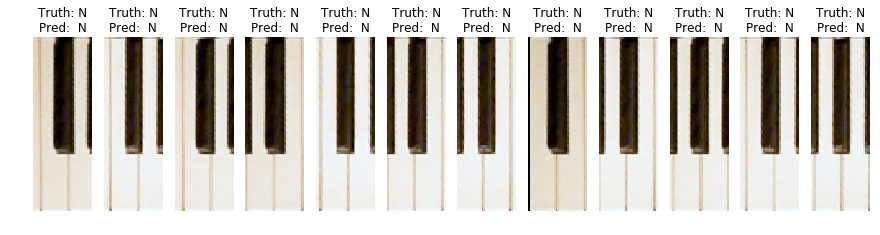

In [7]:
example_batch = 12
fig, axarr = plt.subplots(1, example_batch, figsize=(15,4))
for imgb, noteb, _ in dataset.data_batch(type='test', size='bundle', color='black', batch_size=example_batch, NCHW=True, need_velocity=False, concatenate=concat):
    yb = bmodel.evaluate(imgb, threshold=0.5)
    imgb = np.transpose(imgb, (0, 2, 3, 1))
    print(imgb.shape)
    print(yb)
    for i in range(example_batch):
        axarr[i].imshow(cv2.cvtColor(display_concat_img(imgb, i), cv2.COLOR_BGR2RGB))
        axarr[i].set_title('Truth: ' + visualize_keys(noteb[i]) + '\nPred:  ' + visualize_keys(yb[i]))
        axarr[i].axis('off')
    break
plt.show()